In [1]:
from sqlalchemy import create_engine
import pymysql
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('creditOne.csv')
df.drop(labels="Unnamed: 0", axis="columns", inplace=True)
df["DEFAULT_NEXT_MONTH"] = df["DEFAULT_NEXT_MONTH"].astype('category')
df["SEX"] = df["SEX"].astype("category")
df["EDUCATION"] = df["EDUCATION"].astype("category")
df["MARRIAGE"] = df["MARRIAGE"].astype("category")
df["SEX"] = df["SEX"].astype("category")
df["ID"] = df["ID"].astype("string")
print(df.head())
print(df.info())
print(df.describe())

    ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0  1.0    20000.0  female  university        1  24.0    2.0    2.0   -1.0   
1  2.0   120000.0  female  university        2  26.0   -1.0    2.0    0.0   
2  3.0    90000.0  female  university        2  34.0    0.0    0.0    0.0   
3  4.0    50000.0  female  university        1  37.0    0.0    0.0    0.0   
4  5.0    50000.0    male  university        1  57.0   -1.0    0.0   -1.0   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0   -1.0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1    0.0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2    0.0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3    0.0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4    0.0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT_NEXT_MONTH  
0 

In [3]:
df = df[~df['SEX'].str.contains("X2")]
df = df[~df['EDUCATION'].str.contains("X3")]
df = df[~df['MARRIAGE'].str.contains("X4")]
df = df[~df['DEFAULT_NEXT_MONTH'].str.contains("Y")]

In [54]:
def sexConvertor(str):
    return '1 0' if str == "female" else '0 1'
def educationConverter(str):
    if str == "graduate school": return '1 0 0 0'
    if str == "high school": return '0 1 0 0'
    if str == "other": return '0 0 1 0'
    if str == "university": return '0 0 0 1'
    return '0 0 0 0' 
def marriageConverter(str):
    if str == "0": return '1 0 0 0'
    if str == "1": return '0 1 0 0'
    if str == "2": return '0 0 1 0'
    if str == "3": return '0 0 0 1'
    return '0 0 0 0'

def str to  

df[["SEX_FEMALE", "SEX_MALE"]] = df["SEX"].map(sexConvertor).str.split(' ',expand=True)
df[["ED_GRAD", "ED_HS", "ED_OTHER", "ED_UNI"]] = df["EDUCATION"].map(educationConverter).str.split(' ',expand=True)
df[["MARRIAGE_0", "MARRIAGE_1", "MARRIAGE_2", "MARRIAGE_3"]] = df["MARRIAGE"].map(marriageConverter).str.split(' ',expand=True)

print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30000
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  30000 non-null  string  
 1   LIMIT_BAL           30000 non-null  float64 
 2   SEX                 30000 non-null  category
 3   EDUCATION           30000 non-null  category
 4   MARRIAGE            30000 non-null  category
 5   AGE                 30000 non-null  float64 
 6   PAY_0               30000 non-null  float64 
 7   PAY_2               30000 non-null  float64 
 8   PAY_3               30000 non-null  float64 
 9   PAY_4               30000 non-null  float64 
 10  PAY_5               30000 non-null  float64 
 11  PAY_6               30000 non-null  float64 
 12  BILL_AMT1           30000 non-null  float64 
 13  BILL_AMT2           30000 non-null  float64 
 14  BILL_AMT3           30000 non-null  float64 
 15  BILL_AMT4           30000 non-null  

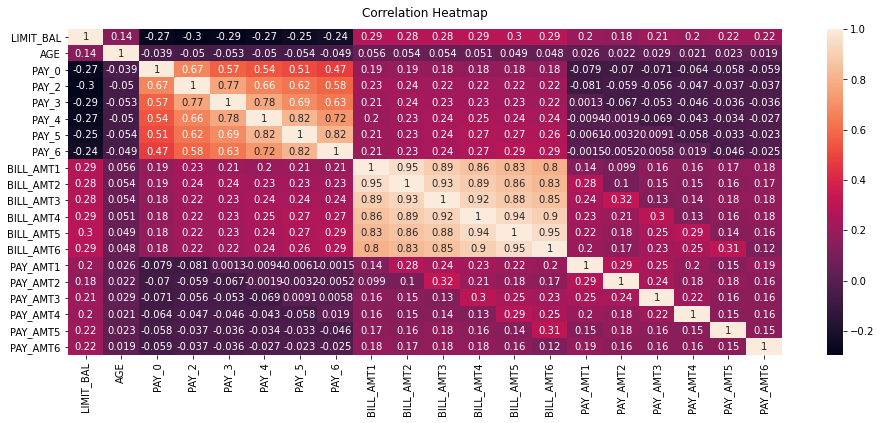

In [5]:
plt.figure(figsize=(16, 6))
corr = df.corr()
cov = df.cov()
heatmap = sns.heatmap(corr, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

LIMIT_BAL


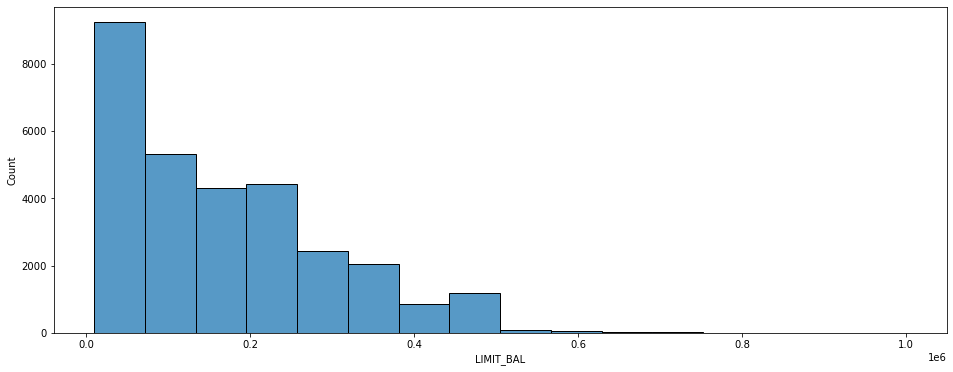

SEX


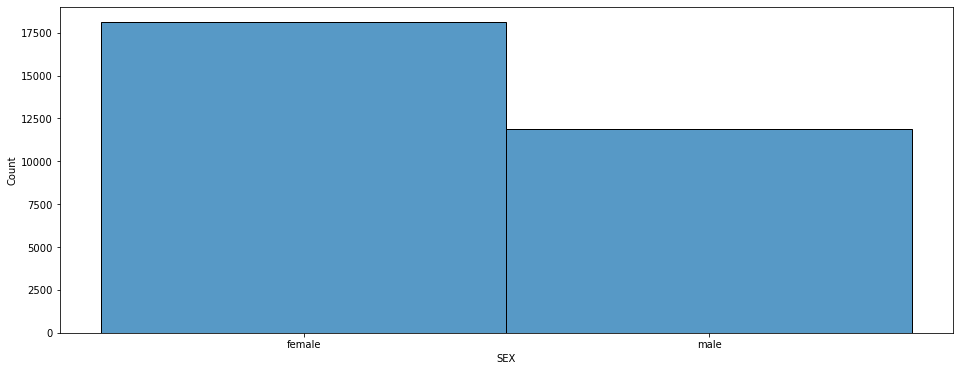

EDUCATION


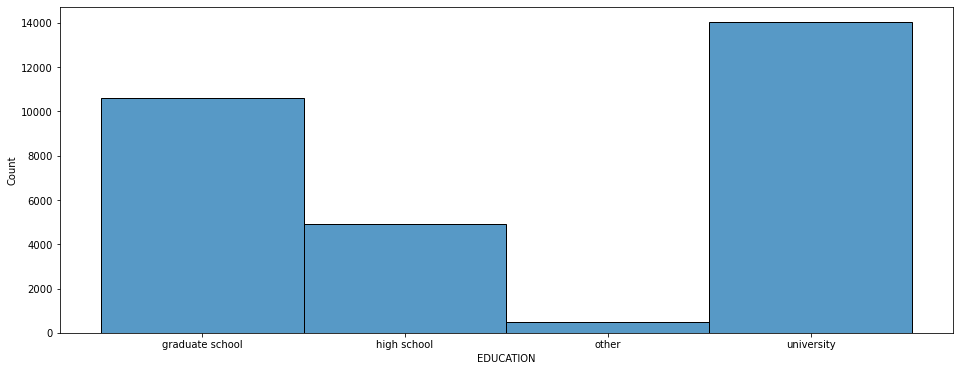

MARRIAGE


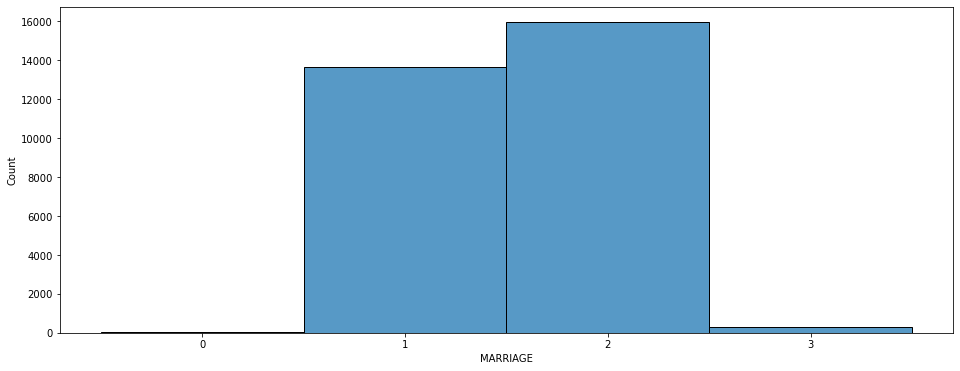

AGE


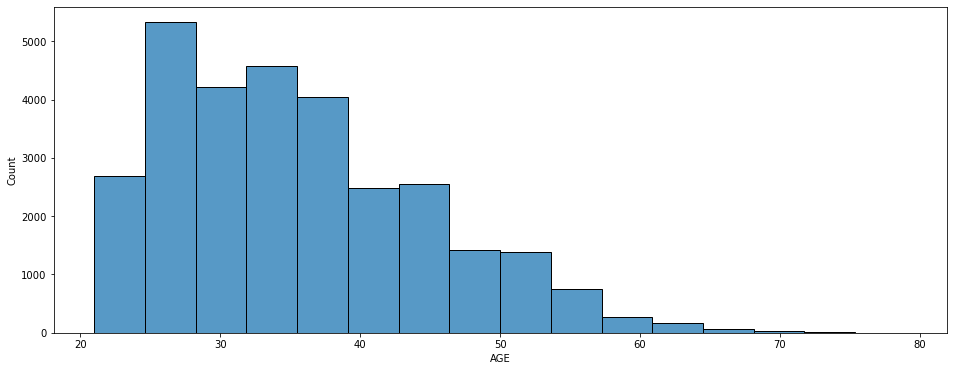

PAY_0


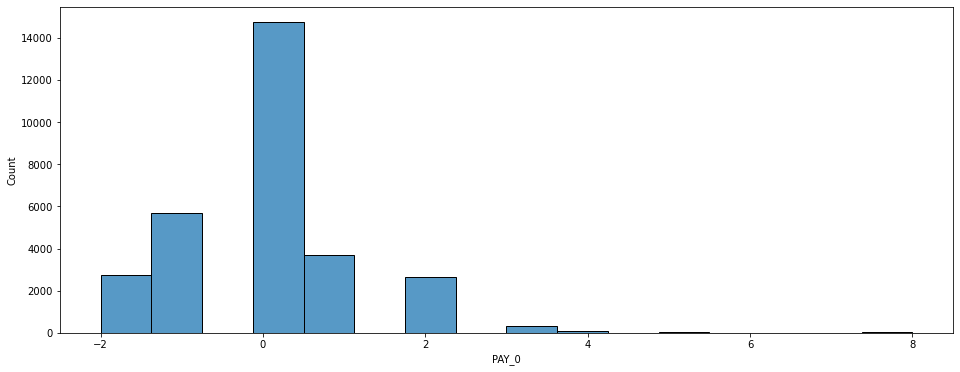

PAY_2


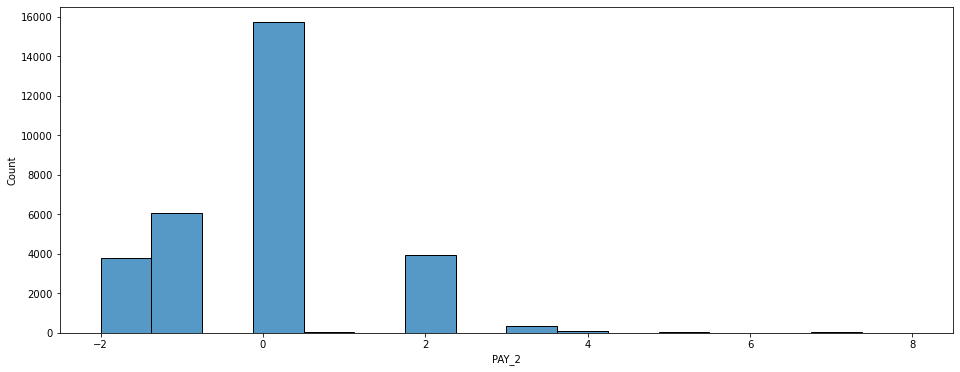

PAY_3


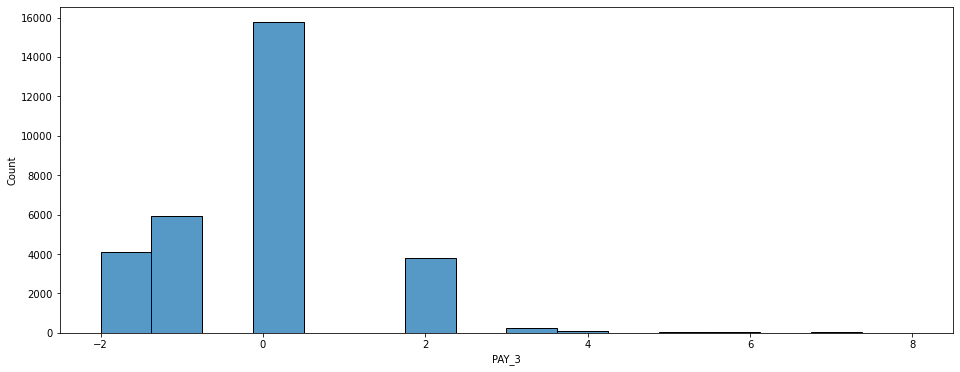

PAY_4


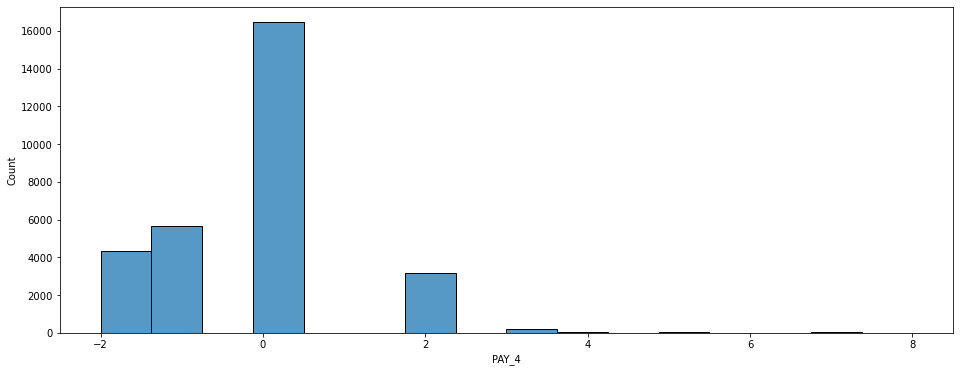

PAY_5


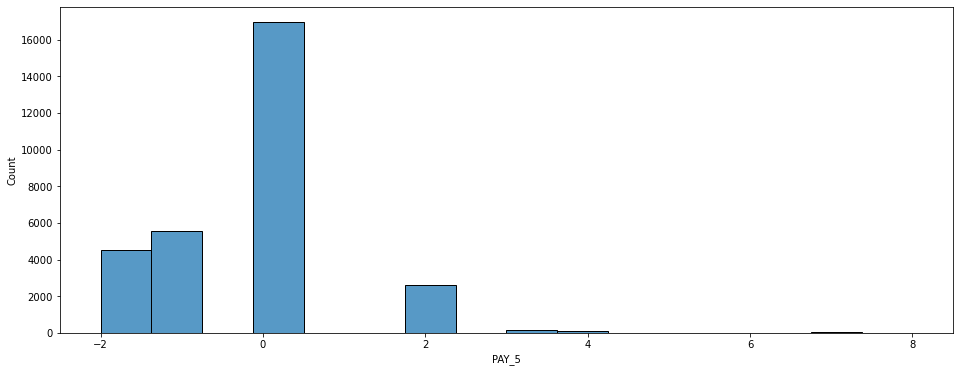

PAY_6


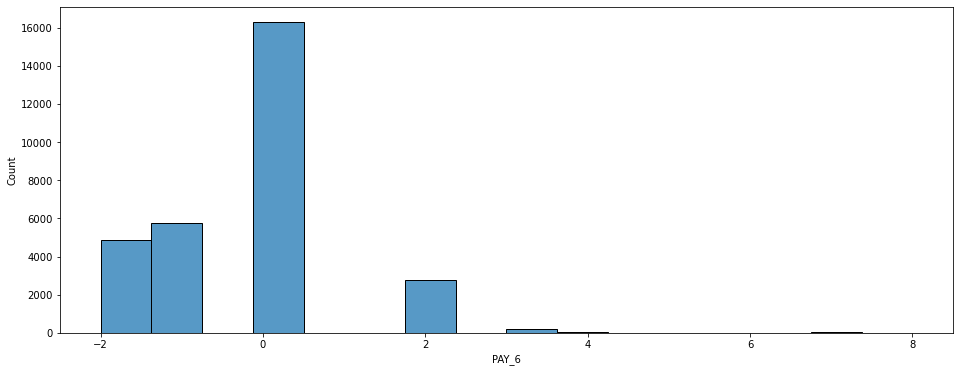

BILL_AMT1


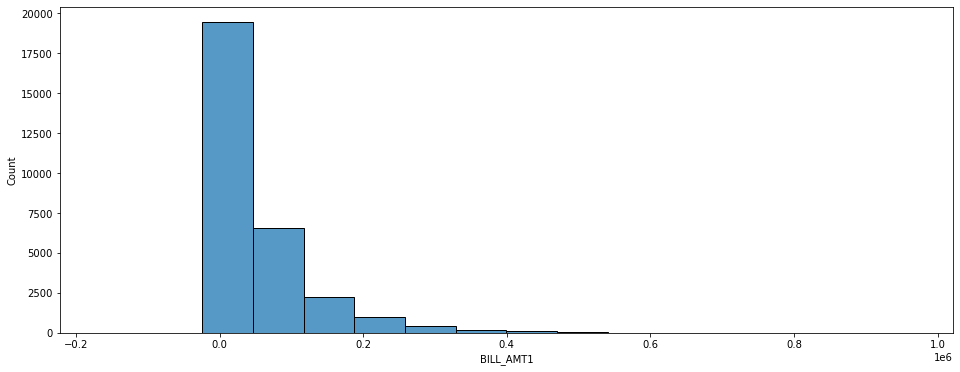

BILL_AMT2


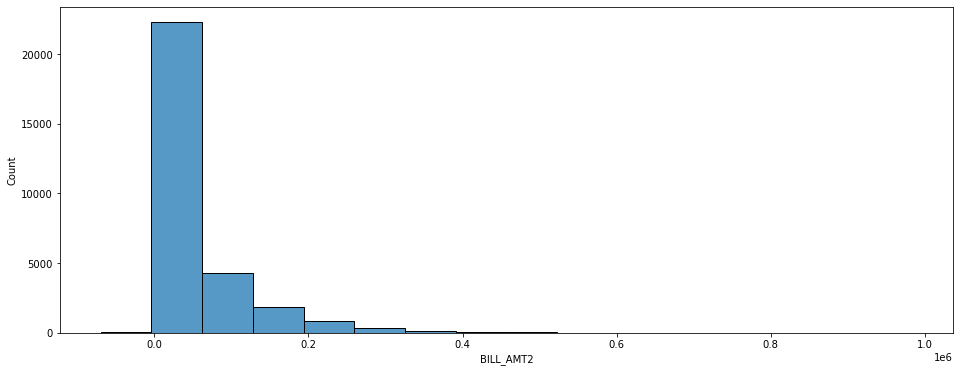

BILL_AMT3


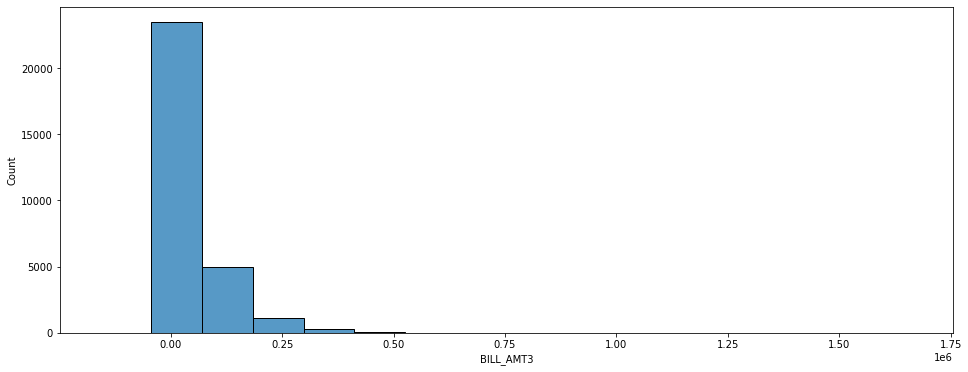

BILL_AMT4


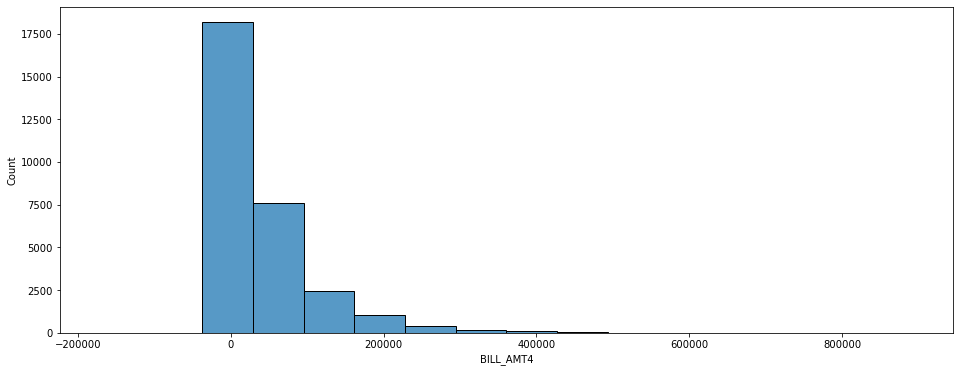

BILL_AMT5


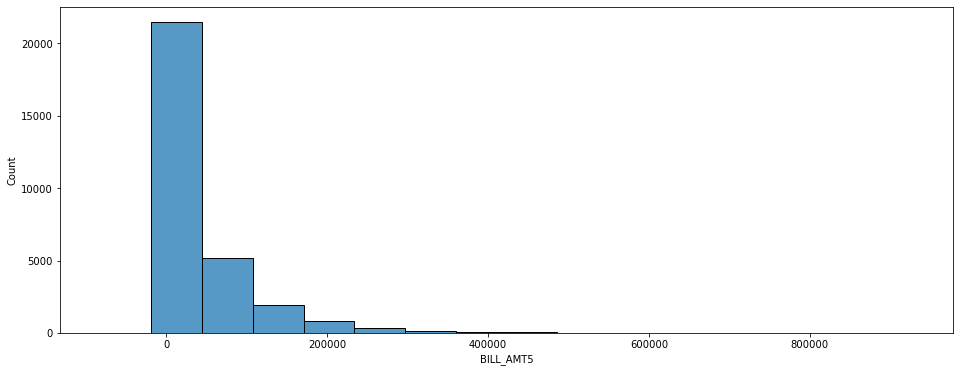

BILL_AMT6


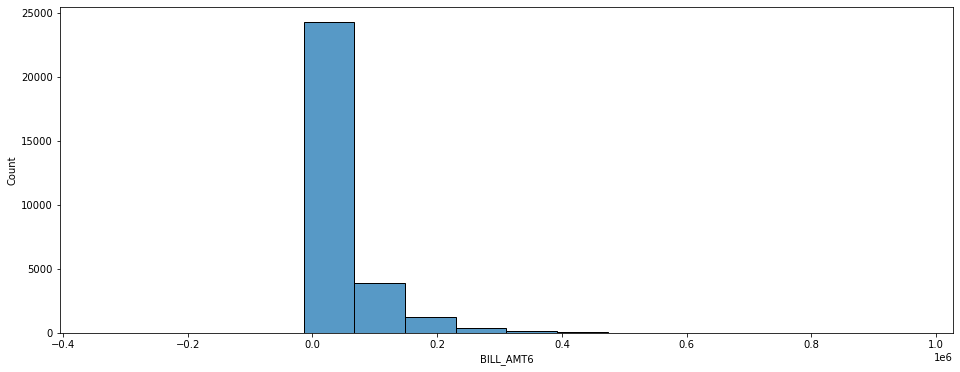

PAY_AMT1


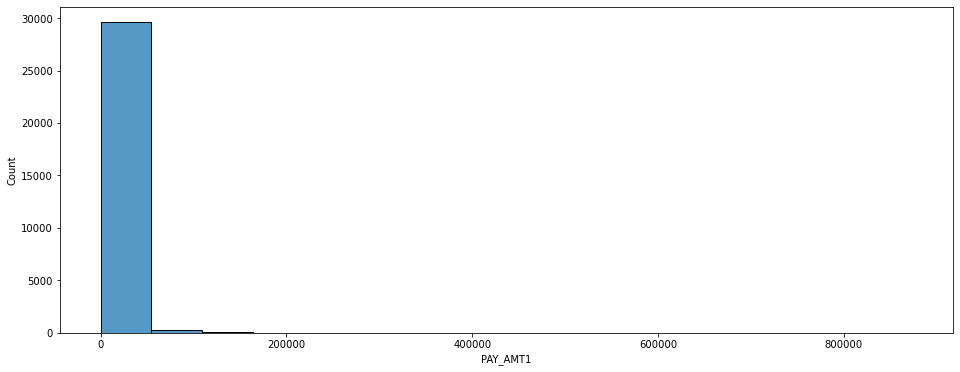

PAY_AMT2


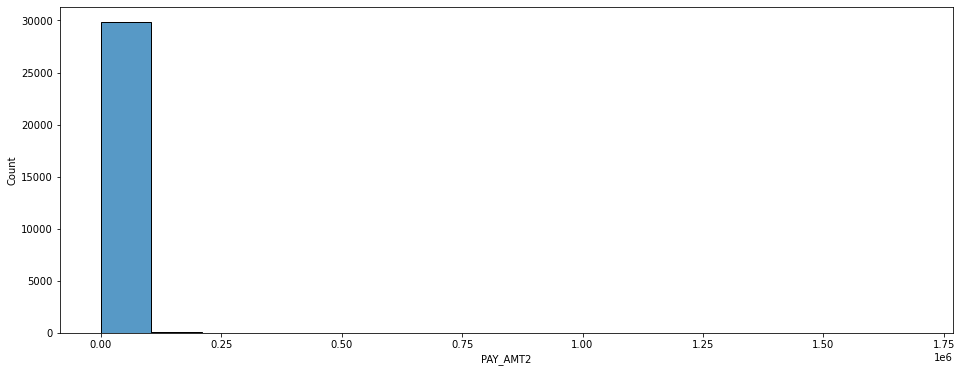

PAY_AMT3


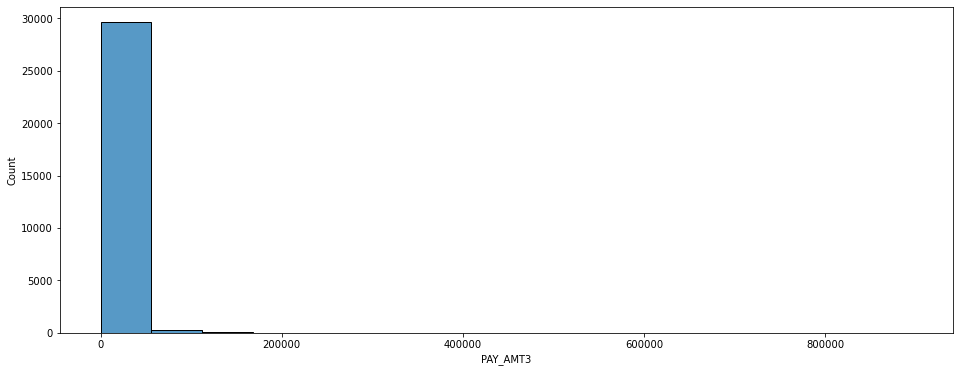

PAY_AMT4


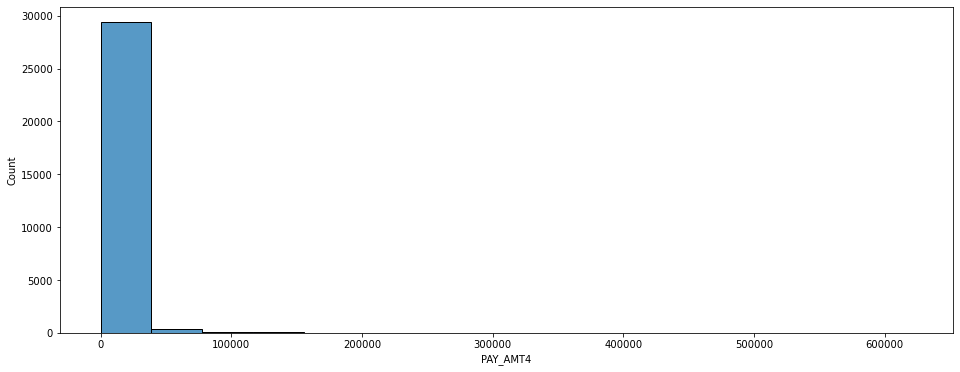

PAY_AMT5


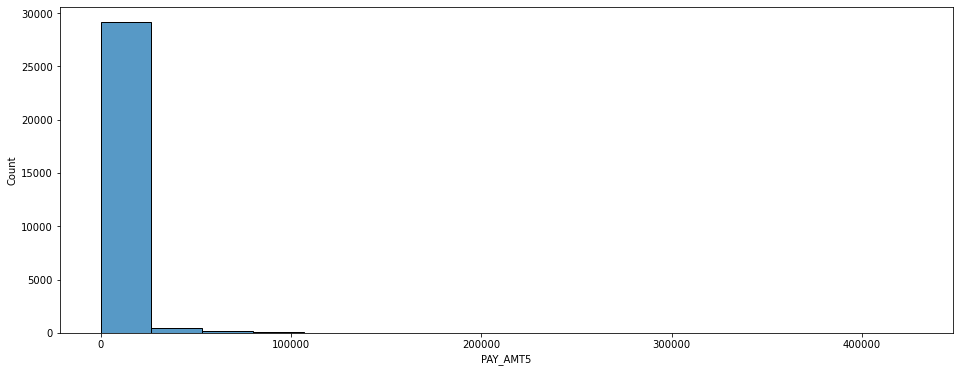

PAY_AMT6


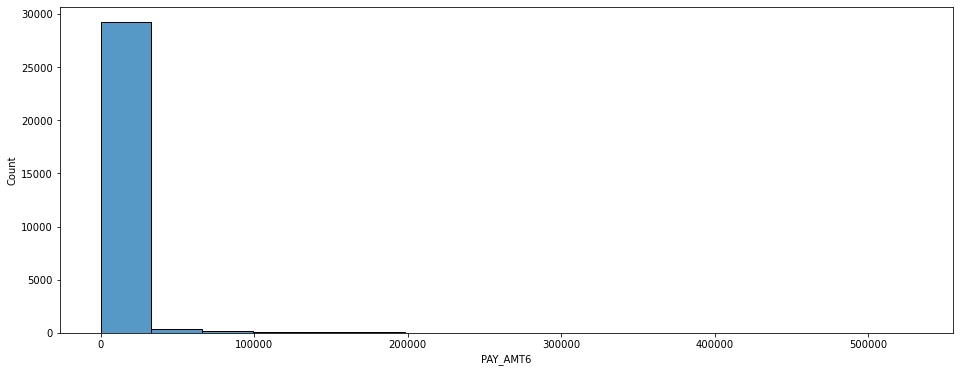

DEFAULT_NEXT_MONTH


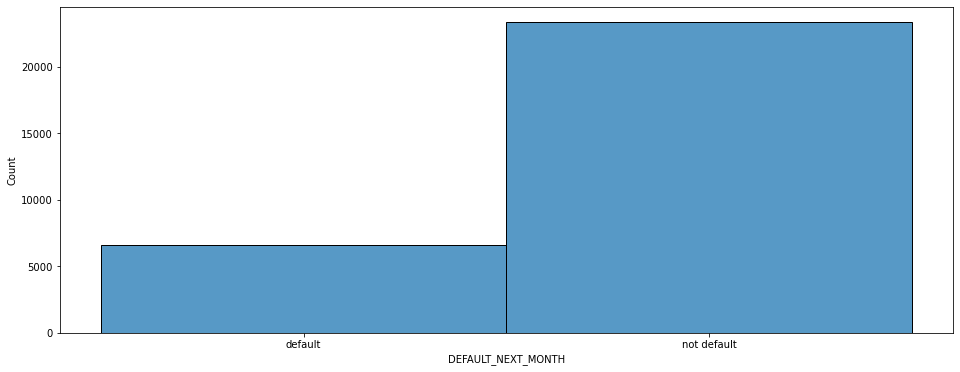

In [6]:
for col in df.columns.values:
    if col == "ID": continue
    print(col)
    plt.figure(figsize=(16,6))
    sns.histplot(data=df, x=col, bins="sturges")
    plt.show()

In [ ]:
for col in df.columns.values:
    if col == "default payment next month": continue
    print(col)
    plt.figure(figsize=(16,6))
    sns.histplot(data=df, x=col, hue="default payment next month")
    plt.show()

In [ ]:
for col1 in df.columns.values:
    for col2 in df.columns.values:
        

In [20]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),

                                   ('two', 'a'), ('two', 'b')])

s = pd.Series(np.arange(1.0, 5.0), index=index)
print(s)

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64


In [23]:
s.unstack(level=-1)

,a,b
one,1.0,2.0
two,3.0,4.0


In [24]:
s.unstack(level=0)

,one,two
a,1.0,3.0
b,2.0,4.0


In [27]:
print(s)
print("")
t = s.unstack(0)
print(t)
print("")
print(t.unstack())

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

   one  two
a  1.0  3.0
b  2.0  4.0

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64
